# Analyze daily portfolio

### Import libraries

In [1]:
import pandas as pd
import numpy as np
from collections import OrderedDict
from utils.util import get_data, plot_data, compute_daily_returns

### Initialization

In [2]:
# Define the timeframe of the analysis
start_date = '2010-01-01'
end_date = '2010-12-31'
dates = pd.date_range(start_date, end_date)

# Define portfolio composition
symbol_allocations = OrderedDict([('GOOG', 0.2), ('AAPL', 0.2), ('GLD', 0.4), ('XOM', 0.2)])
symbols = symbol_allocations.keys()
allocs = symbol_allocations.values()

# Define initial investment
start_val = 1000000

### Load and plot stock data

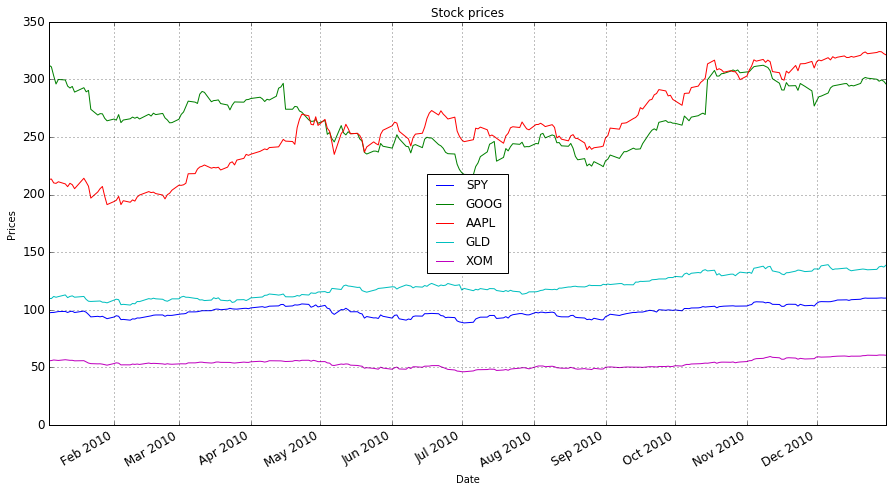

In [3]:
# Load stock data
prices_all = get_data(symbols, dates)
prices = prices_all[symbols]
prices_SPY = prices_all['SPY']
plot_data(prices_all)

### Compute daily portfolio value

In [4]:
# normalize all stock prices
df = prices / prices.ix[0]
# multiply prices by allocations of each equity
df = df * allocs
# multiply allocated values by initial investment value
df = df * start_val
# compute entire portfolio value on each day
port_val = df.sum(axis=1)

### Get portfolio statistics

In [5]:
# Compute cumulative ruturn (from beginning to end)
cum_ret = (port_val[-1] / port_val[0]) - 1
# Compute daily returns
daily_returns = port_val.copy()
daily_returns = (daily_returns/daily_returns.shift(1))-1
daily_returns.ix[0,0] = 0
# Compute daily return mean and standard deviation (note: std_daily_ret = volatility)
avg_daily_ret = daily_returns.mean()
std_daily_ret = daily_returns.std()
# calculate sharp ratio
daily_rf = 0 
samples_per_year = 252
sharpe_ratio = ((daily_returns - daily_rf).mean()/daily_returns.std()) * np.sqrt(samples_per_year)
# Print statistics
print "Start Date:", start_date
print "End Date:", end_date
print "Symbols:", symbols
print "Allocations:", allocs
print "Sharpe Ratio:", sharpe_ratio
print "Volatility (stdev of daily returns):", std_daily_ret
print "Average Daily Return:", avg_daily_ret
print "Cumulative Return:", cum_ret

Start Date: 2010-01-01
End Date: 2010-12-31
Symbols: ['GOOG', 'AAPL', 'GLD', 'XOM']
Allocations: [0.2, 0.2, 0.4, 0.2]
Sharpe Ratio: 1.38749489399
Volatility (stdev of daily returns): 0.00928202662771
Average Daily Return: 0.000811285909471
Cumulative Return: 0.213530867286


### Daily portfolio value vs. SPY

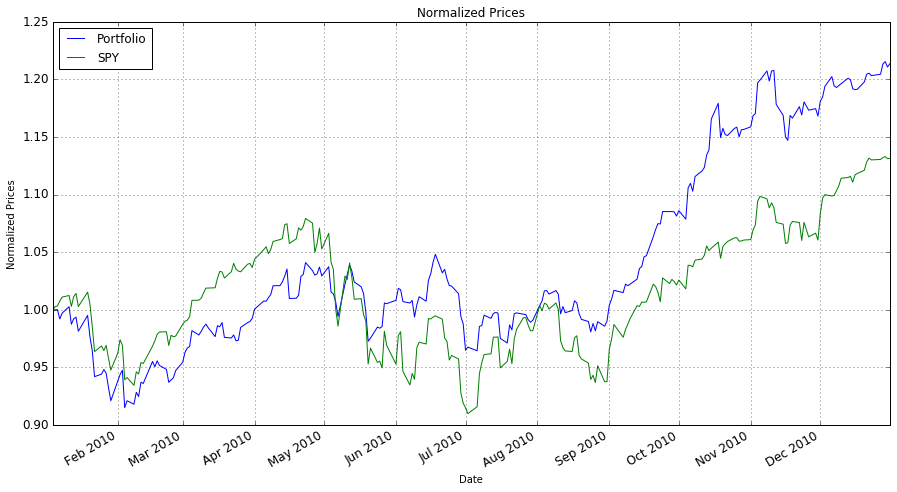

In [6]:
df = pd.concat([port_val, prices_SPY], keys=['Portfolio', 'SPY'],axis=1)
df = df / df.ix[0]
plot_data(df, title='Normalized Prices', ylabel='Normalized Prices')